## INTRODUCTION

Exploratory data analytics requires understanding of data and how different variables are correlated. To understand the data using python data visualization and pandas we will be taking a case study previous application of bank and loan applications data.

The bank applications data has a dependent variable named TARGET variable whose value is 1 when the applicant is a defaulter and have missed the replayment of loan. For other applicants this value will be 0. All other columns in the data are considered independent variables.

We will explore the data step by step, visualize the data, create count/count percentage and summary tables and see how different variables like age, credit ratings,  income etc of the applicant varies with the TARGET variable.

In [112]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

## Reading application_data.csv 

In [113]:
df = pd.read_csv("application_data.csv")

## Sanity Checks

In [114]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [115]:
df.shape

(307511, 122)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## 	Cleaning data by dropping unwanted rows and columns

In [117]:
# Checking if there are any missing values in any of the column

# looks like a lots of columns have a lot of missing values

df.isnull().sum().tail(50)

APARTMENTS_MEDI                 156061
BASEMENTAREA_MEDI               179943
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BUILD_MEDI                204488
COMMONAREA_MEDI                 214865
ELEVATORS_MEDI                  163891
ENTRANCES_MEDI                  154828
FLOORSMAX_MEDI                  153020
FLOORSMIN_MEDI                  208642
LANDAREA_MEDI                   182590
LIVINGAPARTMENTS_MEDI           210199
LIVINGAREA_MEDI                 154350
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAREA_MEDI              169682
FONDKAPREMONT_MODE              210295
HOUSETYPE_MODE                  154297
TOTALAREA_MODE                  148431
WALLSMATERIAL_MODE              156341
EMERGENCYSTATE_MODE             145755
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
FLAG_DOCUMENT_2                      0
FLAG_DOCUMENT_3          

In [118]:
0.25*307511

76877.75

In [119]:
0.30*307511

92253.3

In [120]:
print(0.25*df.shape[0])
print(0.30*df.shape[0])

76877.75
92253.3


In [121]:
# listing the null values columns having more than 25% i.e 1/4th of the data in a column

col_empty = df.isnull().sum()
print(len(col_empty))
col_empty = col_empty[col_empty.values>(0.25*df.shape[0])]
len(col_empty)

122


50

In [122]:
col_empty

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE           

In [123]:
col_empty.values

array([202929,  96391, 173378, 156061, 179943, 150007, 204488, 214865,
       163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514,
       169682, 156061, 179943, 150007, 204488, 214865, 163891, 154828,
       153020, 208642, 182590, 210199, 154350, 213514, 169682, 156061,
       179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642,
       182590, 210199, 154350, 213514, 169682, 210295, 154297, 148431,
       156341, 145755], dtype=int64)

From above we can clearly see that we have 64 columns which have more than 25% of the total values as missing

In [124]:
# For proper analysis we shall get rid of these columns to avoid improper insights

col_empty = list(col_empty[col_empty.values>=0.25].index)
df.drop(labels=col_empty,axis=1,inplace=True)
print(len(col_empty))

50


In [125]:
#checking the shape again for clarity
df.shape

(307511, 72)

In [126]:
# Checking columns with less null perecentage
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 72, dtype: int64

We can see that AMT_ANNUITY has 12 missing values and the difference between maximum and minimum value is very large, hence we will choose median to fill the null values.

In [127]:
df["AMT_ANNUITY"].median()


24903.0

In [128]:
df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median() , inplace = True)

Now we will access the remaining column and then delete the columns which are of no use in terms of our analysis at all

After going through all the columns , it seems the Flag columns are of no use and will not help in any kind of analysis, hence we will remove them

In [129]:
Col_NotReq=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [130]:
#Dropping the labels which are not reuired
df.drop(labels = Col_NotReq ,axis = 1 , inplace = True)

In [131]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',

After going through values of all the columns using .value_counts we came across 2 columns namely CODE GENDER AND ORGANISATION TYPE which have values "XNA" which is nothing but the null values. We will to try and fix them.


In [132]:
#ORGANIZATION TYPE
df["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [133]:
#CODE_GENDER 

df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [134]:
#We will fill all the XNA values with the most occouring value in the table i.e "F"
df["CODE_GENDER"] = df["CODE_GENDER"].apply(lambda x : "F" if x == "XNA" else x)

In [135]:
df["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values.
Which means 18% (approx) of the column is having this values. 
Hence if we drop the rows of total 55374, will might have  major impact on our dataset as it will also remove the remaining 
relevant values of other column 

In [136]:
df["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [137]:
#we will change the value of "XNA" with np.nan, this will help us formulate the data and will not compel us to delete the other 
#relivant rows

# df["ORGANIZATION_TYPE"] = df["ORGANIZATION_TYPE"].apply(lambda x : np.nan if x == "XNA" else x)

In [138]:
# Now figuring out the numaric and non numaric columns in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [139]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       1.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       2.0                      0.0   
4  ...                       0.0                      0.0   

  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0                      2.0                      2.0   
1                      1.0                      0.0   
2                      0.0                      0.0   
3                      2.0                      0.0   
4                      0.0                      0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 42 columns]

# Univariate Analysis

In [140]:
df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

From this we understand that 24825 application of 307511 was with payment difficulties 

In [141]:
app_data_0 = df[df["TARGET"] == 0]
app_data_0.shape

(282686, 42)

In [142]:
app_data_1 = df[df["TARGET"] == 1]
app_data_1.shape

(24825, 42)

### Analysis based on AMT_INCOME_TOTAL

In [143]:
app_data_1.AMT_INCOME_TOTAL.describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

We will check if there are any outliers present in AMT_INCOME_TOTAL

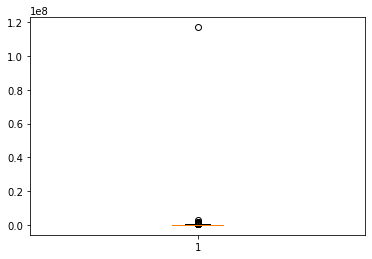

In [144]:
plt.boxplot(app_data_1.AMT_INCOME_TOTAL)
plt.show()

There are outliers. Lets find out the the data distribution in the range of 95% to 100%

In [145]:
app_data_1.AMT_INCOME_TOTAL.quantile([0.95,0.99,0.995,0.999,1])

0.950       315000.0
0.990       450000.0
0.995       540000.0
0.999       840420.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

Taking the 99.3% value to ignore the outlier 

In [146]:
sns.boxplot(app_data_1[app_data_1.AMT_INCOME_TOTAL<=app_data_1.AMT_INCOME_TOTAL.quantile(0.993)].AMT_INCOME_TOTAL)
plt.show()

We can see even though there are outliers the data distribution is continuous  

In [147]:
income_1 = app_data_1[app_data_1.AMT_INCOME_TOTAL<=app_data_1.AMT_INCOME_TOTAL.quantile(0.993)]

###### Checking the Income of the applications who did not fail to make payments 

In [148]:
app_data_0.AMT_INCOME_TOTAL.describe()

count    2.826860e+05
mean     1.690777e+05
std      1.104763e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

We will check if there are any outliers present in AMT_INCOME_TOTAL of non- default applications 

In [149]:
sns.boxplot(app_data_0.AMT_INCOME_TOTAL)
plt.show()

There are outliers. Lets find out the the data distribution in the range of 95% to 100%

In [150]:
app_data_0.AMT_INCOME_TOTAL.quantile([0.95,0.99,0.995,0.999,1])

0.950      337500.0
0.990      486000.0
0.995      630000.0
0.999      900000.0
1.000    18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64

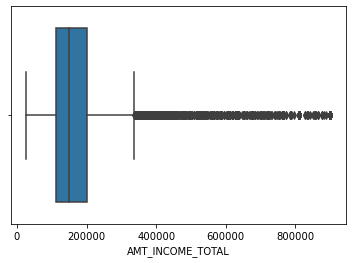

In [151]:
sns.boxplot(app_data_0[app_data_0.AMT_INCOME_TOTAL<=app_data_0.AMT_INCOME_TOTAL.quantile(0.999)].AMT_INCOME_TOTAL)
plt.show()

From the above box plot we can see that median lies in the range somewhere between 16000 and 17000 of the amount income total

In [152]:
income_0 = app_data_0[app_data_0.AMT_INCOME_TOTAL<=app_data_0.AMT_INCOME_TOTAL.quantile(0.999)]

## DISTPLOT of INCOME_TOTAL of Non Defaulters and Defaulters 

In [153]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.title('Income of Non-Defaulters')
sns.distplot(income_0.AMT_INCOME_TOTAL)

plt.subplot(1, 2, 2)
plt.title('Income of Defaulters')
sns.distplot(income_1.AMT_INCOME_TOTAL)
plt.show()

 Here we can see that for Defaulters the income is more speard while for Non Defaulters we see some uniformity

### Analysis based on NAME_INCOME_TYPE

In [155]:
app_data_0.NAME_INCOME_TYPE.value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

In [156]:
app_data_1.NAME_INCOME_TYPE.value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

## DISTPLOT of INCOME_TYPE of Non Defaulters and Defaulters 

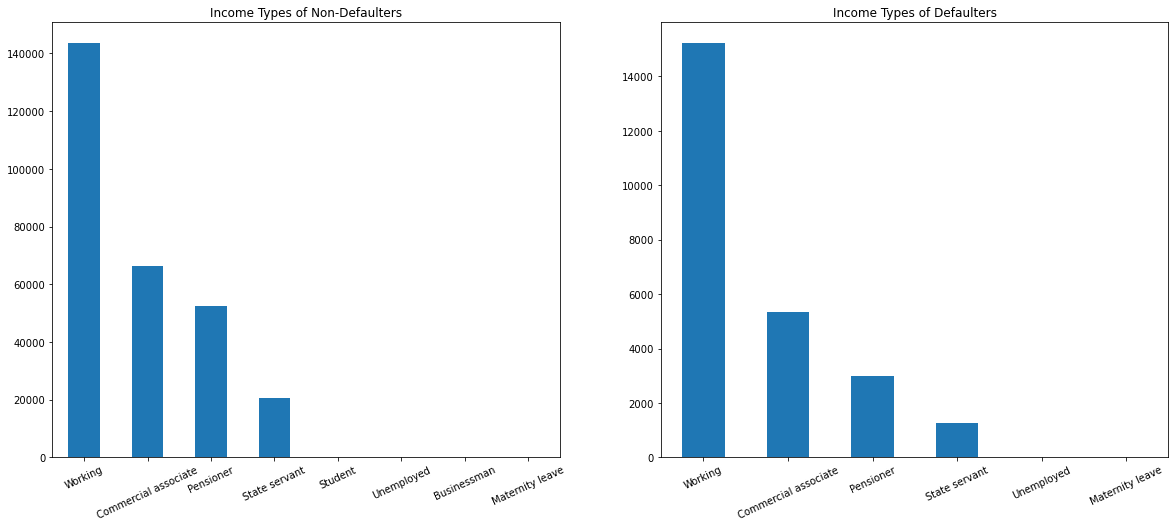

In [157]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.title('Income Types of Non-Defaulters')
app_data_0.NAME_INCOME_TYPE.value_counts().plot(kind='bar',rot=25)

plt.subplot(1, 2, 2)
plt.title('Income Types of Defaulters')
app_data_1.NAME_INCOME_TYPE.value_counts().plot(kind='bar',rot=25)
plt.show()

In both cases most of the applications are from "Working", "Commercial associate" and "Pensioner"

### Analysis based on NAME_EDUCATION_TYPE

In [158]:
app_data_0.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

In [159]:
app_data_1.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

## DISTPLOT of Education_Type of Non Defaulters and Defaulters 

In [160]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.title('Education Types of Non-Defaulters')
app_data_0.NAME_EDUCATION_TYPE.value_counts().plot(kind='bar',rot=25)

plt.subplot(1, 2, 2)
plt.title('Education Types of Defaulters')
app_data_1.NAME_EDUCATION_TYPE.value_counts().plot(kind='bar',rot=25)
plt.show()

There isn't much to infer from the above table it's just that the people higher educaton are less likely to become defaulters

## Analysis based on NAME_FAMILY_SATUS

In [161]:
app_data_0.NAME_FAMILY_STATUS.value_counts()

Married                 181582
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [162]:
app_data_1.NAME_FAMILY_STATUS.value_counts()

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

## DISTPLOT of FAMILY_STATUS of Non Defaulters and Defaulters 

In [163]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.title('Family Status of Non-Defaulters')
app_data_0.NAME_FAMILY_STATUS.value_counts().plot(kind='bar',rot=25)

plt.subplot(1, 2, 2)
plt.title('Family Status of Defaulters')
app_data_1.NAME_FAMILY_STATUS.value_counts().plot(kind='bar',rot=25)
plt.show()

There isn't much to infer from the above table as the proportionality seems similar both in defaulter and no defaulters

## Analysis based on NAME_HOUSING_TYPE

In [164]:
app_data_0.NAME_HOUSING_TYPE.value_counts()

House / apartment      251596
With parents            13104
Municipal apartment     10228
Rented apartment         4280
Office apartment         2445
Co-op apartment          1033
Name: NAME_HOUSING_TYPE, dtype: int64

In [165]:
app_data_1.NAME_HOUSING_TYPE.value_counts()

House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: NAME_HOUSING_TYPE, dtype: int64

## DISTPLOT of HOUSING_TYPE of Non Defaulters and Defaulters 

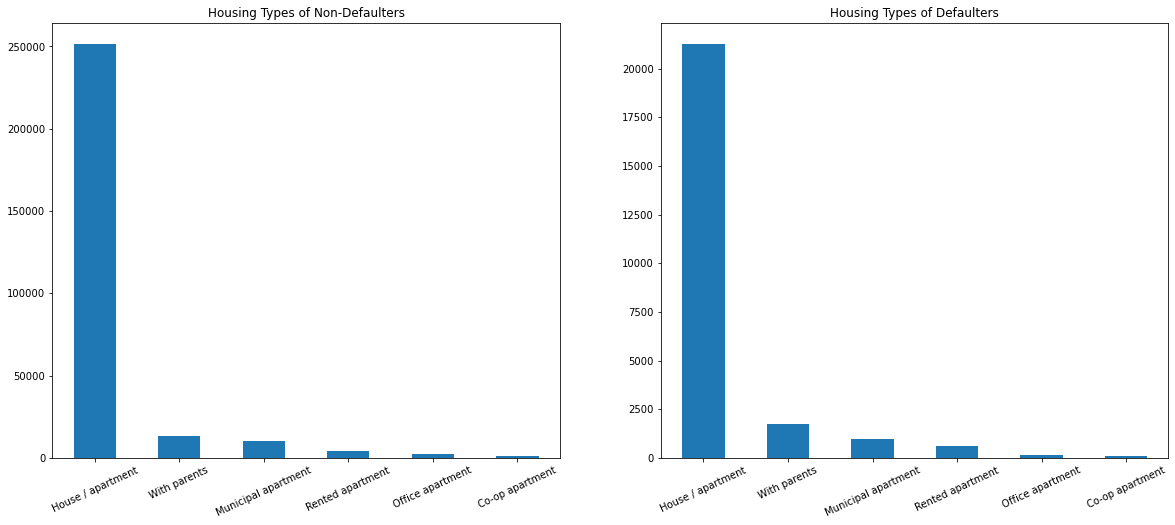

In [166]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.title('Housing Types of Non-Defaulters')
app_data_0.NAME_HOUSING_TYPE.value_counts().plot(kind='bar',rot=25)

plt.subplot(1, 2, 2)
plt.title('Housing Types of Defaulters')
app_data_1.NAME_HOUSING_TYPE.value_counts().plot(kind='bar',rot=25)
plt.show()

There isn't much to infer from the above table it's just that the people higher educaton are less likely to become defaulters

## Analysis based on AMT_CREDIT

In [167]:
plt.boxplot(app_data_1.AMT_CREDIT)
plt.show()

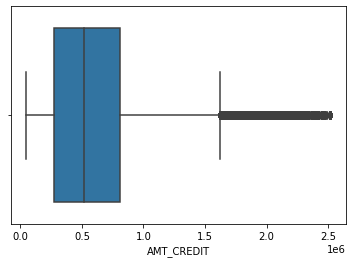

In [168]:
 ## There are few outliers which we have to remove before analysing further 
sns.boxplot(app_data_0[app_data_0.AMT_CREDIT<=app_data_0.AMT_CREDIT.quantile(0.9995)].AMT_CREDIT)
plt.show()

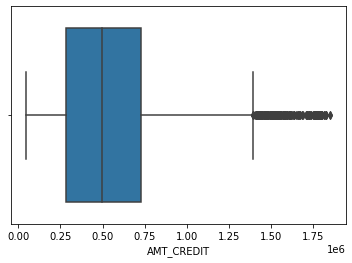

In [169]:
sns.boxplot(app_data_1[app_data_1.AMT_CREDIT<=app_data_1.AMT_CREDIT.quantile(0.995)].AMT_CREDIT)
plt.show()

In [170]:
credit_0= app_data_0[app_data_0.AMT_CREDIT<=app_data_0.AMT_CREDIT.quantile(0.9995)]
credit_1= app_data_1[app_data_1.AMT_CREDIT<=app_data_1.AMT_CREDIT.quantile(0.995)]

In [171]:
# Plot distibution  for AMT_CREDIT (removing outliers)
plt.figure(figsize=(20,6))
plt.title('Income of Non-Defaulters')
plt.subplot(1, 2, 1)
sns.distplot(credit_0.AMT_CREDIT)

plt.subplot(1, 2, 2)
plt.title('Credit of Defaulters')
sns.distplot(credit_1.AMT_CREDIT)
plt.show()

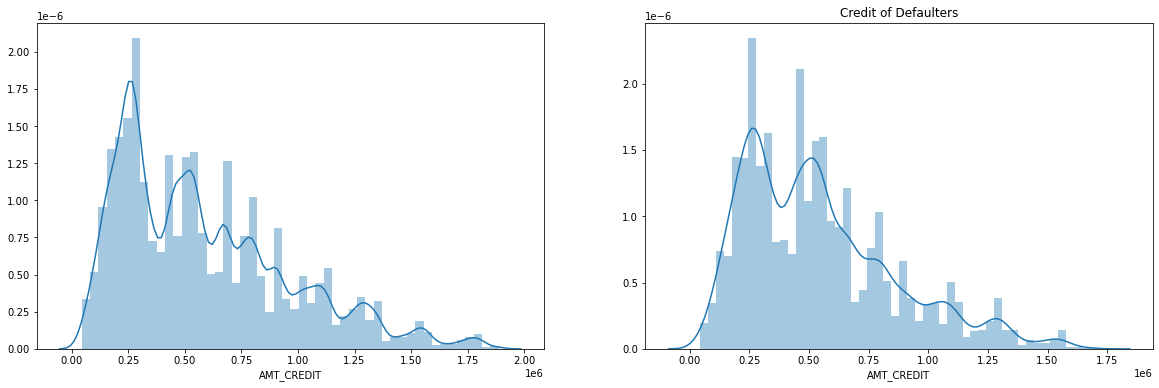

In [172]:
# Plot distibution  for AMT_CREDIT (considering values till(99%))
credit_0= app_data_0[app_data_0.AMT_CREDIT<=app_data_0.AMT_CREDIT.quantile(0.99)]
credit_1= app_data_1[app_data_1.AMT_CREDIT<=app_data_1.AMT_CREDIT.quantile(0.99)]
plt.figure(figsize=(20,6))
plt.title('Income of Non-Defaulters')
plt.subplot(1, 2, 1)
sns.distplot(credit_0.AMT_CREDIT)

plt.subplot(1, 2, 2)
plt.title('Credit of Defaulters')
sns.distplot(credit_1.AMT_CREDIT)
plt.show()

 Here we can see that the defaulters take loan in accordance with the polulation for not being in the radar of SUSPICION.

## Analysis based on AMT_ANNUITY  

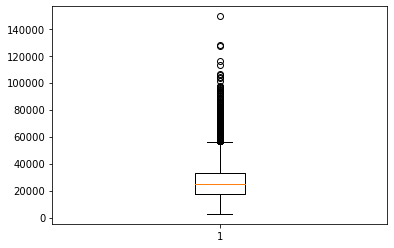

In [174]:
plt.boxplot(app_data_1.AMT_ANNUITY)
plt.show()

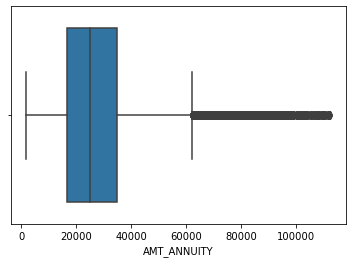

In [175]:
 ## There are few outliers which we have to remove before analysing further 
sns.boxplot(app_data_0[app_data_0.AMT_ANNUITY<=app_data_0.AMT_ANNUITY.quantile(0.999)].AMT_ANNUITY)
plt.show()

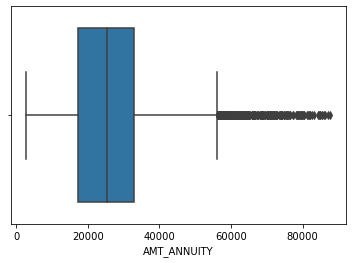

In [176]:
## There are few outliers which we have to remove before analysing further 
sns.boxplot(app_data_1[app_data_1.AMT_ANNUITY<=app_data_1.AMT_ANNUITY.quantile(0.999)].AMT_ANNUITY)
plt.show()

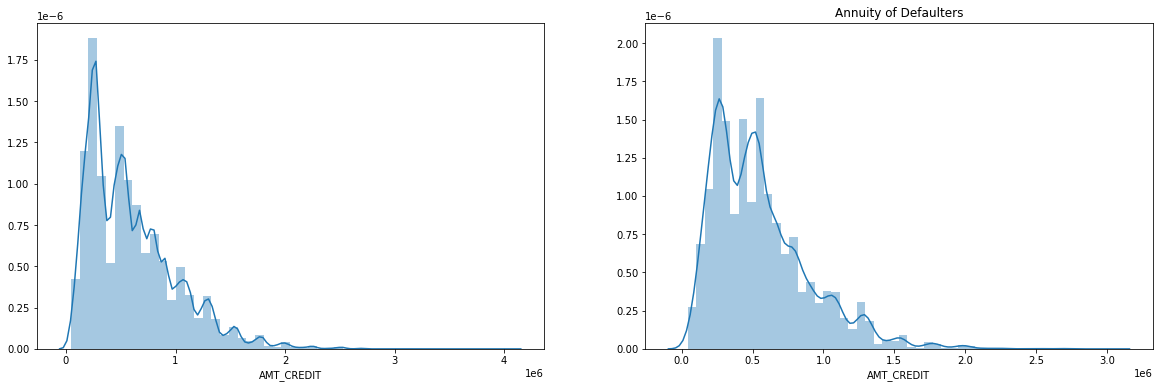

In [177]:
# Plot distibution  for AMT_ANNUITY (considering values till(99%))
annuity_0= app_data_0[app_data_0.AMT_ANNUITY<=app_data_0.AMT_ANNUITY.quantile(0.999)]
annuity_1= app_data_1[app_data_1.AMT_ANNUITY<=app_data_1.AMT_ANNUITY.quantile(0.999)]

plt.figure(figsize=(20,6))
plt.title('Annuity of Non-Defaulters')
plt.subplot(1, 2, 1)
sns.distplot(annuity_0.AMT_CREDIT)

plt.subplot(1, 2, 2)
plt.title('Annuity of Defaulters')
sns.distplot(annuity_1.AMT_CREDIT)
plt.show()

In [178]:
## Analysis based on AMT_ANNUITY  

## Analysis based on ORGANIZATION_TYPE  and NAME_INCOME_TYPE   

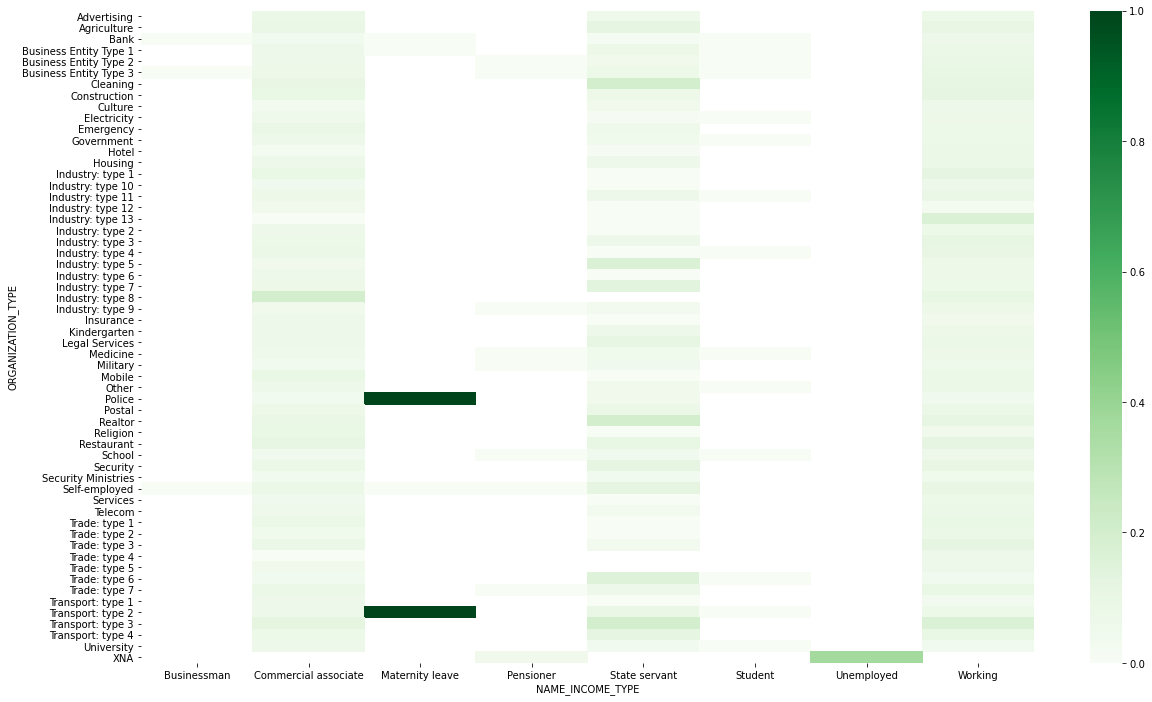

In [179]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
plt.figure(figsize=(20,12))
res = pd.pivot_table(data=df,columns='NAME_INCOME_TYPE',index='ORGANIZATION_TYPE',values='TARGET',aggfunc=np.mean)
sns.heatmap(res,cmap="Greens")
plt.show()

######  Surprisingly "Working" people from "POLICE" AND "TRANSPORT TYPE 2" have most number of defaulters 

## Analysis based on ORGANIZATION_TYPE  and NAME_EDUCATION_TYPE

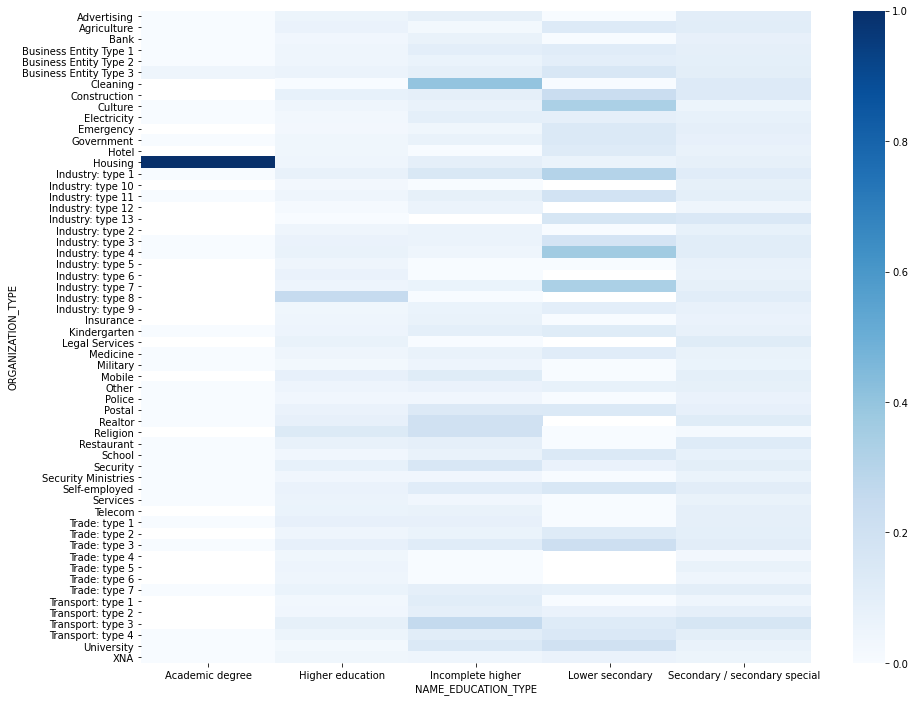

In [180]:
plt.figure(figsize=(15,12))
res1 = pd.pivot_table(data=df,columns='NAME_EDUCATION_TYPE',index='ORGANIZATION_TYPE',values='TARGET',aggfunc=np.mean)
sns.heatmap(res1,cmap="Blues")
plt.show()

#### Here we can see that people who have education type as ACADEMIC DEGREE AND ORGANISATION TYPE AS "HOUSING" AND "CLEANING" have most number of defaulters 

## Analysis based on ORGANIZATION_TYPE  and NAME_FAMILY_STATUS

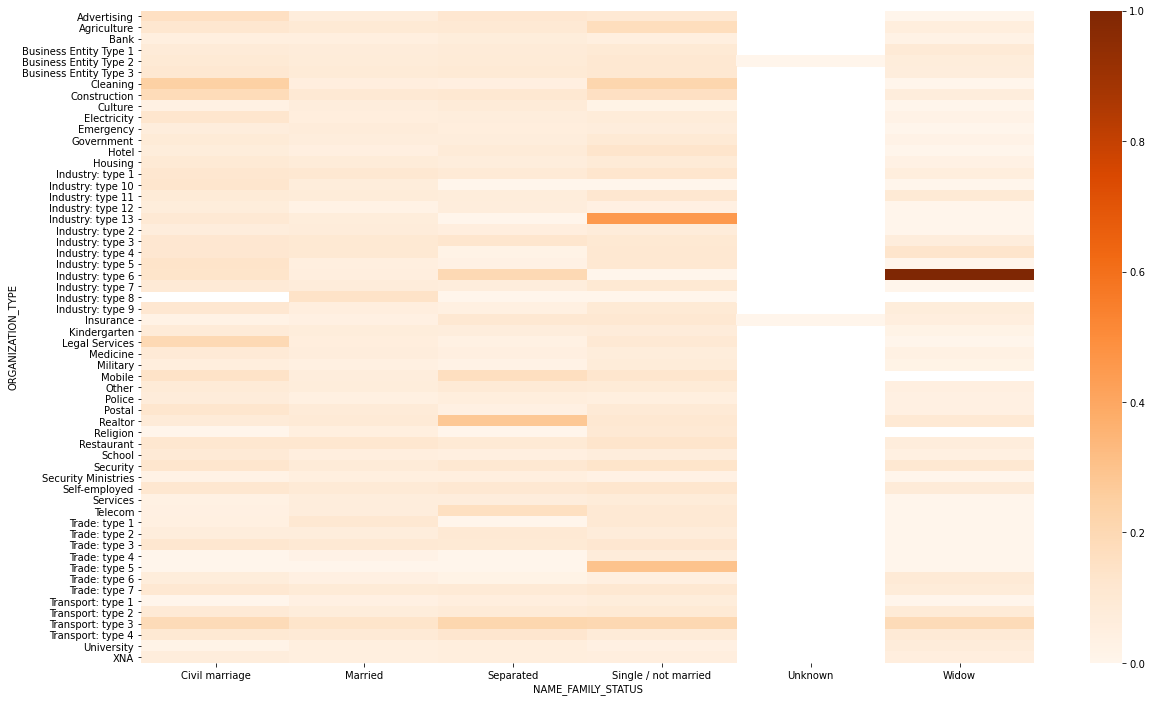

In [181]:
plt.figure(figsize=(20,12))
res2 = pd.pivot_table(data=df,columns='NAME_FAMILY_STATUS',index='ORGANIZATION_TYPE',values='TARGET',aggfunc=np.mean)
sns.heatmap(res2,cmap="Oranges")
plt.show()

#### Here we can see that people who have family status as "WIDOW" AND "CLEANING" , AND ORGANSATION TYPE as "INDUSTRY TYPE 6" and "INDUSTRY TYPE 12" have most number of defaulters 

## Analysis based on ORGANIZATION_TYPE  and NAME_HOUSING_TYPE

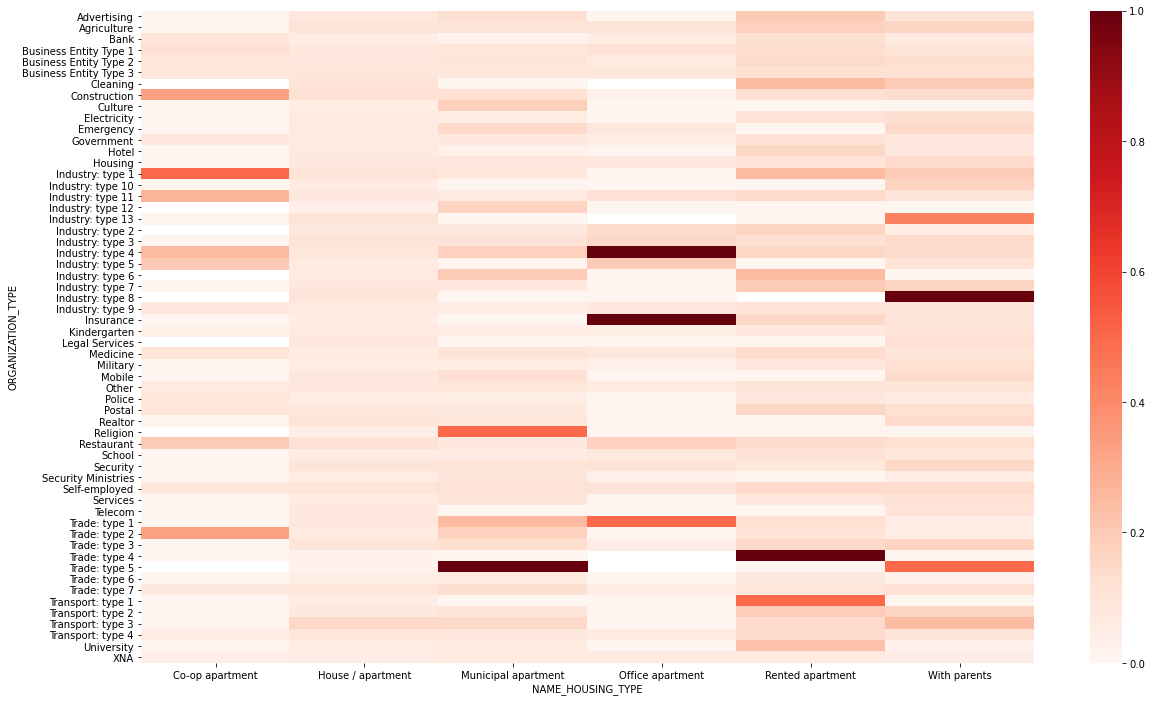

In [182]:
plt.figure(figsize=(20,12))
res3 = pd.pivot_table(data=df,columns='NAME_HOUSING_TYPE',index='ORGANIZATION_TYPE',values='TARGET',aggfunc=np.mean)
sns.heatmap(res3,cmap="Reds")
plt.show()

#### From the heat map above we can see few dark patches belonging to different housing type

#### 1> Co-op apartment - Industry type 1 ,Trde Type 2 
#### 2> Municiple Apartment - Trade Type 5 , Religion
#### 3> Office apartment - Insurance and Trade Type 4
#### 4> Rented apartment - Trade Type 4
#### 5> with parents - Industry Type 8

#### These are few housing types where its been the maximum number of defaulters .bank should check properly before giving them any credit.

### Analysis based on FLAG_OWN_REALTY and FLAG_OWN_CAR

In [183]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.countplot(x='FLAG_OWN_REALTY',hue='TARGET',data=df)

plt.subplot(2, 2, 2)
sns.countplot(x='FLAG_OWN_CAR',hue='TARGET',data=df)

plt.subplot(2, 2, 3)
res = pd.pivot_table(data=df,columns='FLAG_OWN_CAR',index='FLAG_OWN_REALTY',values='TARGET',aggfunc=np.mean)
sns.heatmap(res,cmap="Greens")
plt.show()

### Trying to find correlation between the numeric values 

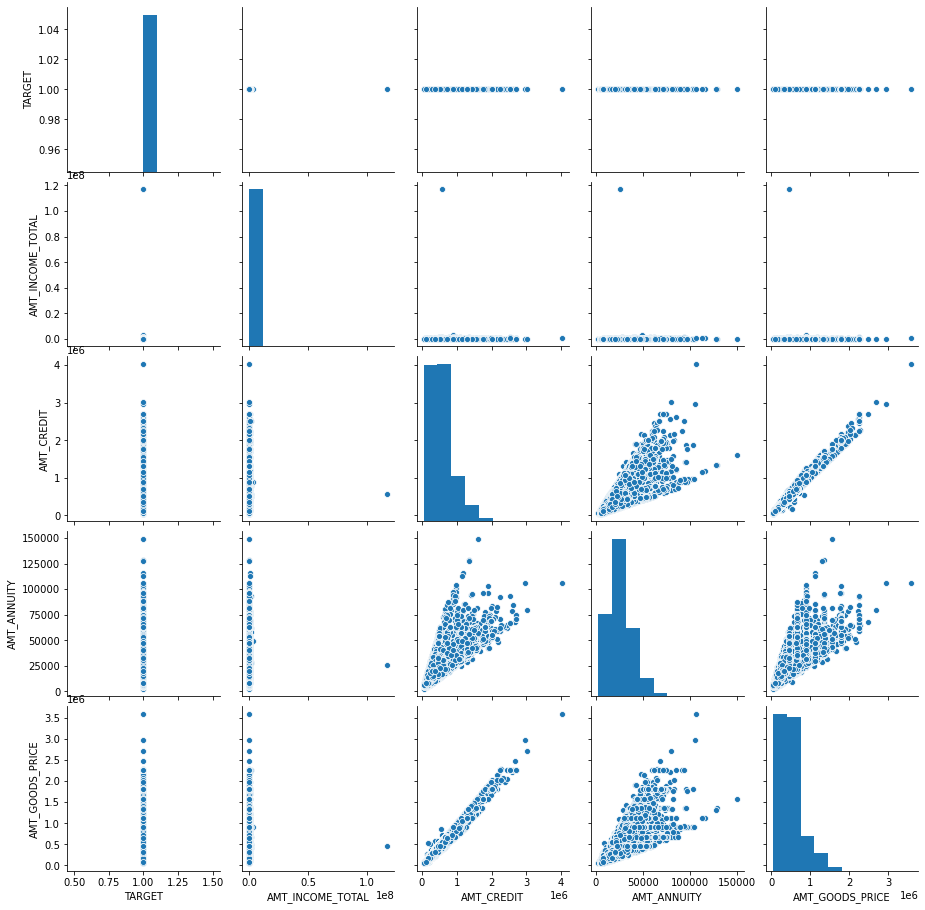

In [184]:
sns.pairplot(app_data_1[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

In [185]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',

## Correalation between  Credit Amount and Education Status with Name Family Status

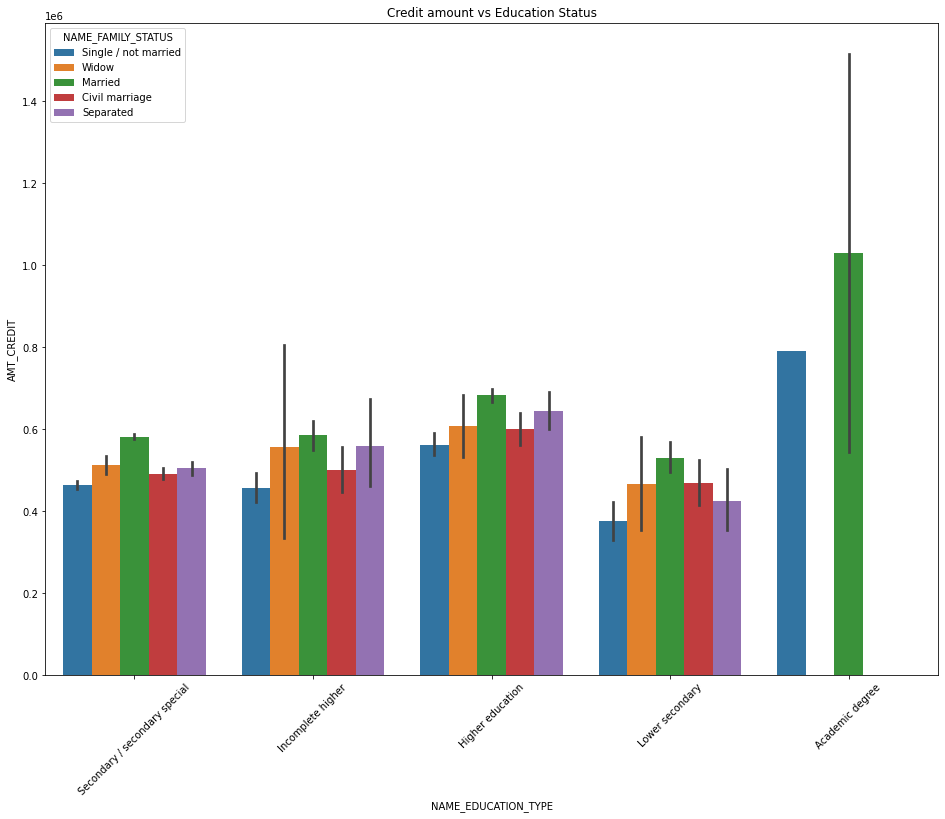

In [186]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.barplot(data =app_data_1 , x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### From the above box plot we can conclude that amongst the DEFAULTERS Family status of 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. 

## Correlation between Credit Amount and Income Status with Name Housing Type

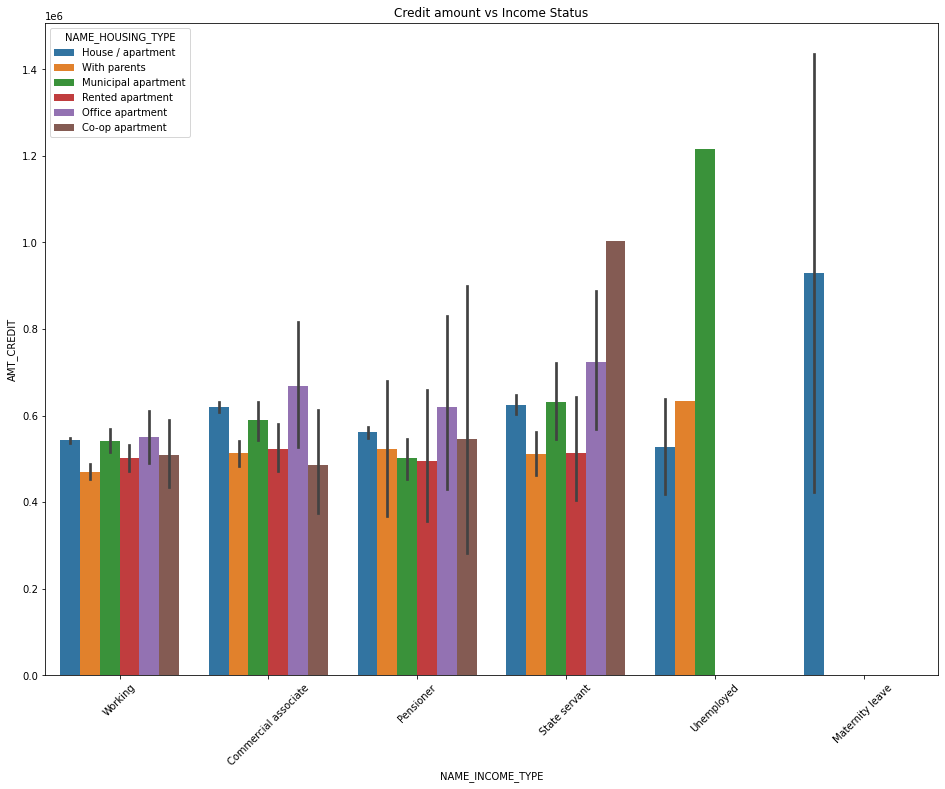

In [187]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.barplot(data =app_data_1 , x='NAME_INCOME_TYPE',y='AMT_CREDIT', hue ='NAME_HOUSING_TYPE',orient='v')
plt.title('Credit amount vs Income Status')
plt.show()

#### From the result above we can concur among the defaulters, municiplal apartment housing type who are unemployed tend to take more credit and not repay

In [188]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',

# Reading previous_application.csv

In [233]:
prev_data = pd.read_csv("previous_application.csv")
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [190]:
prev_data.shape

(1670214, 37)

In [191]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Cleaning data by dropping unwanted rows and columns

In [192]:
prev_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [234]:
# listing the null values columns having more than 25% i.e 1/4th of the data in a column

col_empty = prev_data.isnull().sum()

col_empty_1 = col_empty[col_empty.values>(0.25*prev_data.shape[0])]
len(col_empty_1)

11

In [235]:
# For proper analysis we shall get rid of these columns to avoid improper insights

col_empty_list = list(col_empty_1.index)
prev_data.drop(labels=col_empty_list,axis=1,inplace=True)
#checking the shape again for clarity
prev_data.shape

In [237]:
# Checking columns with less null perecentage
prev_data.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [198]:
prev_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [199]:
prev_data.PRODUCT_COMBINATION.fillna('NA' , inplace = True)

In [200]:
# prev_data.AMT_CREDIT.fillna(prev_data.AMT_CREDIT.median() , inplace = True)

In [201]:
# prev_data.isnull().sum()

In [202]:
prev_data.shape

(1670214, 23)

In [203]:
# prev_data["NAME_CONTRACT_TYPE"].value_counts()

#### NAME_CONTRACT_STATUS

In [238]:
plt.figure(figsize = (6,6))
prev_data["NAME_CONTRACT_STATUS"].value_counts().plot(kind = "pie")

#### NAME_CASH_LOAN_PURPOSE

In [205]:
# Removing the column values of 'XNA' and 'XAP'

prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [206]:
plt.figure(figsize = (20,12))
sns.countplot(data = prev_data, y= 'NAME_CASH_LOAN_PURPOSE',order=prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',palette='rainbow')
plt.show()

#### Here we can clearly see that Repairs have most people where the loan requirement is rejected

### Merging previous data with application data

In [239]:
# Now merging the Application dataset with previous appliaction dataset

comb_data=pd.merge(left=df,right=prev_data,how='inner',on='SK_ID_CURR')

In [240]:
## Replace 'XNA	', 'XAP' with NaN
comb_data.replace('XNA', np.NaN, inplace=True)
comb_data.replace('XAP', np.NaN, inplace=True)

### Checking for null values and if column has more that 13 % missing data and excluding them from analysis 

In [209]:
COL_NAN = comb_data.isnull().sum() * 100 / len(comb_data)
COL_NAN.sort_values( ascending=False)

NAME_GOODS_CATEGORY            100.000000
NAME_SELLER_INDUSTRY            91.569185
CODE_REJECT_REASON              41.854476
EXT_SOURCE_3                    16.434114
ORGANIZATION_TYPE               13.453285
                                  ...    
REG_CITY_NOT_WORK_CITY           0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_WORK_REGION       0.000000
SK_ID_CURR                       0.000000
Length: 64, dtype: float64

In [210]:
del_col = COL_NAN[COL_NAN.values>13]
print('No of colums with more than 13% missing values : ',len(del_col))

No of colums with more than 13% missing values :  5


In [211]:
## Removing this colums 
comb_data.drop(labels=list(del_col.index),axis=1,inplace=True)
comb_data.shape

(59413, 59)

### Descriptive Analysis

In [241]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 67 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413701 non-null  float64
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64
 11  NAME_TYPE_SUITE               1410175 non-null  object 
 12  NAME_INCOME_TYPE            

### We will start with analysing the previous data

In [244]:
comb_prev = comb_data[['TARGET','SK_ID_PREV','NAME_CONTRACT_TYPE_y','AMT_APPLICATION','AMT_CREDIT_y','WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
'NFLAG_LAST_APPL_IN_DAY','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_CLIENT_TYPE','CHANNEL_TYPE','SELLERPLACE_AREA','PRODUCT_COMBINATION','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_YIELD_GROUP','NAME_PAYMENT_TYPE'
                      ,'AMT_ANNUITY_y','AMT_GOODS_PRICE_y']]
comb_prev.head()

TARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_APPLICATION  AMT_CREDIT_y  \
0       1     1038818       Consumer loans         179055.0      179055.0   
1       0     1810518           Cash loans         900000.0     1035882.0   
2       0     2636178       Consumer loans         337500.0      348637.5   
3       0     2396755       Consumer loans          68809.5       68053.5   
4       0     1564014       Consumer loans          24282.0       20106.0   

  WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  \
0                     SATURDAY                          9   
1                       FRIDAY                         12   
2                       SUNDAY                         17   
3                     SATURDAY                         15   
4                       FRIDAY                          5   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1             Approved   

   ...  NAME_CLIENT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0  ...               New                    Stone              500   
1  ...          Repeater  Credit and cash offices               -1   
2  ...         Refreshed                    Stone             1400   
3  ...         Refreshed             Country-wide              200   
4  ...               New         Regional / Local               30   

           PRODUCT_COMBINATION NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0      POS other with interest            POS               NaN   
1             Cash X-Sell: low           Cash            x-sell   
2   POS industry with interest            POS               NaN   
3  POS household with interest            POS               NaN   
4  POS mobile without interest            POS               NaN   

  NAME_YIELD_GROUP      NAME_PAYMENT_TYPE AMT_ANNUITY_y  AMT_GOODS_PRICE_y  
0       low_normal                    NaN      9251.775           179055.0  
1       low_normal                    NaN     98356.995           900000.0  
2           middle  Cash through the bank     64567.665           337500.0  
3           middle  Cash through the bank      6737.310            68809.5  
4           middle  Cash through the bank      5357.250            24282.0  

[5 rows x 21 columns]

## Handling outliers

In [214]:
sns.boxplot( data=comb_prev[['AMT_APPLICATION','AMT_CREDIT_y']])
plt.show()

In [215]:
sns.boxplot( data=comb_prev[comb_prev.AMT_CREDIT_y<=comb_prev.AMT_CREDIT_y.quantile(0.99)][['AMT_APPLICATION','AMT_CREDIT_y']])
plt.show()

In [216]:
## removing outliers from AMT_CREDIT
comb_prev = comb_prev[comb_prev.AMT_CREDIT_y<=comb_prev.AMT_CREDIT_y.quantile(0.99)]

In [217]:
sns.boxplot( data=comb_prev[['AMT_APPLICATION','AMT_CREDIT_y']])
plt.show()

## Univariate Analysis
    -Continuous
    -Categorical

#### Univariate Analysis based on AMT_CREDIT & AMT_APPLICATION

In [218]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Amount Credit of Previous Applications")
sns.distplot(comb_prev[comb_prev.TARGET==0].AMT_CREDIT_y,hist=False,label='Paid')
sns.distplot(comb_prev[comb_prev.TARGET==1].AMT_CREDIT_y,hist=False,label='Default')
# plt.show()
plt.subplot(1,2,2)
plt.title('Amount application of Previous Applications')
sns.distplot(comb_prev[comb_prev.TARGET==0].AMT_APPLICATION,hist=False,label='Paid')
sns.distplot(comb_prev[comb_prev.TARGET==1].AMT_APPLICATION,hist=False,label='Default')
plt.show()

From this plot we can see AMT_APPLICATION or AMT_CREDIT is not a deciding factor for defaluters

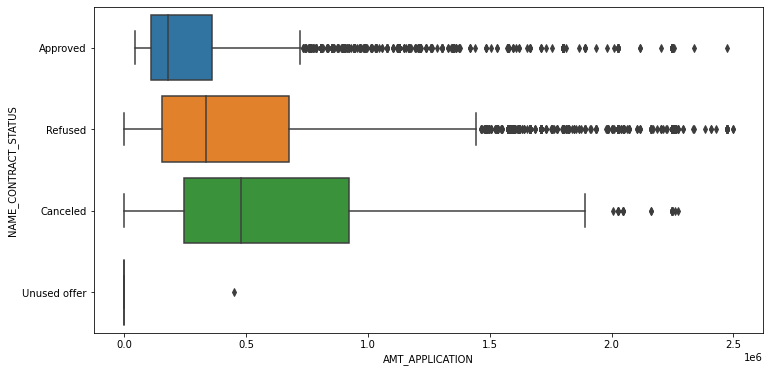

In [219]:
plt.figure(figsize=(12,6))
sns.boxplot(x='AMT_APPLICATION',y='NAME_CONTRACT_STATUS',data=comb_prev)
plt.show()

#### Univariate Analysis based on AMT_ANNUITY & AMT_GOODS_PRICE

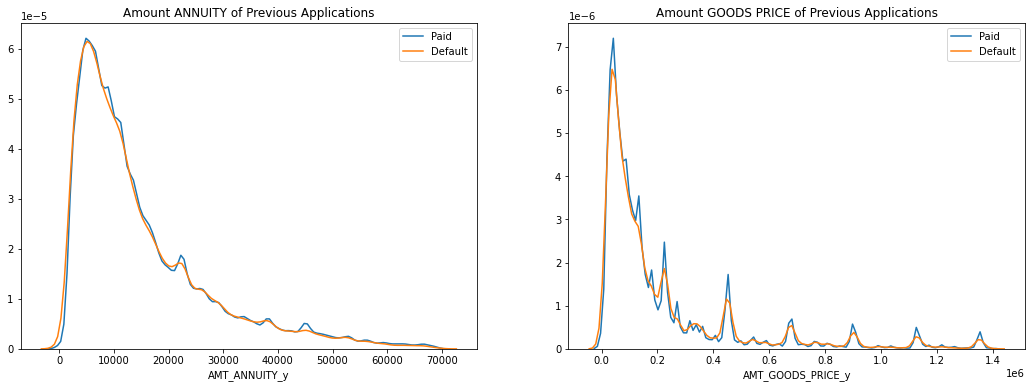

In [248]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
d1 = comb_prev[comb_prev.AMT_ANNUITY_y<=comb_prev.AMT_ANNUITY_y.quantile(0.99)]
plt.title("Amount ANNUITY of Previous Applications")
sns.distplot(d1[d1.TARGET==0].AMT_ANNUITY_y,hist=False,label='Paid')
sns.distplot(d1[d1.TARGET==1].AMT_ANNUITY_y,hist=False,label='Default')
# plt.show()
plt.subplot(1,2,2)
d2 = comb_prev[comb_prev.AMT_GOODS_PRICE_y<=comb_prev.AMT_GOODS_PRICE_y.quantile(0.99)]
plt.title('Amount GOODS PRICE of Previous Applications')
sns.distplot(d2[d2.TARGET==0].AMT_GOODS_PRICE_y,hist=False,label='Paid')
sns.distplot(d2[d2.TARGET==1].AMT_GOODS_PRICE_y,hist=False,label='Default')
plt.show()

From this plot we can see AMT_ANNUITY or AMT_GOODS_PRICE is not a deciding factor for defaluters (both the fields has significance missing value)

#### NAME_CONTRACT_TYPE

In [221]:
sns.countplot(data = comb_prev, y= 'NAME_CONTRACT_TYPE_y', 
                   order=comb_prev['NAME_CONTRACT_TYPE_y'].value_counts().index,hue = 'TARGET',palette='Set1') 
plt.show()

From this analysis we can say that combination data have only 'Cash Loans' CONTRACT_TYPE

#### WEEKDAY_APPR_PROCESS_START_y

In [222]:
A = comb_prev[comb_prev.TARGET==1].WEEKDAY_APPR_PROCESS_START_y.value_counts().to_frame('DEFAULT')
B = comb_prev.WEEKDAY_APPR_PROCESS_START_y.value_counts().to_frame('TOTAL')
C = pd.concat([A, B], axis=1) 
cols=pd.Series(C.columns)
C['Percentage'] = C['DEFAULT']
C['Percentage'] = C['Percentage'].apply(lambda x:x/C.TOTAL*100)
plt.figure(figsize=(12,3))
sns.barplot(x=C.index,data=C,y=C.Percentage,palette='Set3')
plt.show()

We can say that there are more defaulters on the week days but that is may be because it will be holidays on weekends 

#### NAME_CLIENT_TYPE

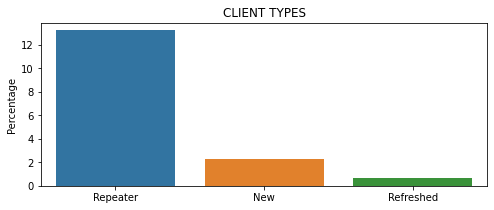

In [223]:
A = comb_prev[comb_prev.TARGET==1].NAME_CLIENT_TYPE.value_counts().to_frame('DEFAULT')
B = comb_prev.NAME_CLIENT_TYPE.value_counts().to_frame('TOTAL')
C = pd.concat([A, B], axis=1) 
cols=pd.Series(C.columns)
C['Percentage'] = C['DEFAULT']
C['Percentage'] = C['Percentage'].apply(lambda x:x/C.TOTAL*100)
plt.figure(figsize=(8,3))
plt.title("CLIENT TYPES")
sns.barplot(x=C.index,data=C,y=C.Percentage)
plt.show()

From this analysis we can say that reaeat costomers are more likely to default than new customers

#### PRODUCT_COMBINATION

In [224]:
A = comb_prev[comb_prev.TARGET==1].PRODUCT_COMBINATION.value_counts().to_frame('DEFAULT')
B = comb_prev.PRODUCT_COMBINATION.value_counts().to_frame('TOTAL')
C = pd.concat([A, B], axis=1) 
cols=pd.Series(C.columns)
C['Percentage'] = C['DEFAULT']
C['Percentage'] = C['Percentage'].apply(lambda x:x/C.TOTAL*100)
plt.figure(figsize=(15,3))
plt.title("PRODUCT COMBINATION")
sns.barplot(x=C.Percentage,data=C,y=C.index,palette='Set2')
plt.show()

Applications with product combination  as Cash Street: high has most percentage of defaulters 

#### CHANNEL_TYPE

In [225]:
A = comb_prev[comb_prev.TARGET==1].CHANNEL_TYPE.value_counts().to_frame('DEFAULT')
B = comb_prev.CHANNEL_TYPE.value_counts().to_frame('TOTAL')
C = pd.concat([A, B], axis=1) 
cols=pd.Series(C.columns)
C['Percentage'] = C['DEFAULT']
C['Percentage'] = C['Percentage'].apply(lambda x:x/C.TOTAL*100)
plt.figure(figsize=(15,6))
plt.title("Channel Type")
sns.barplot(x=C.Percentage,data=C,y=C.index,palette='Set1')
plt.show()

Applicants applying loan from 'Credit and cash offices' has most percentage of defaulters 

## Analysis of "NAME_CASH_LOAN_PURPOSE" with TARGET

In [226]:
plt.figure(figsize = (10,16))
sns.countplot(data = comb_data, y= 'NAME_CASH_LOAN_PURPOSE',order=comb_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              hue = 'TARGET',palette='Set1') 
plt.show()

From the above plot we can see people who have taken loan for REPAIR tend to become defaulters and do not pay.

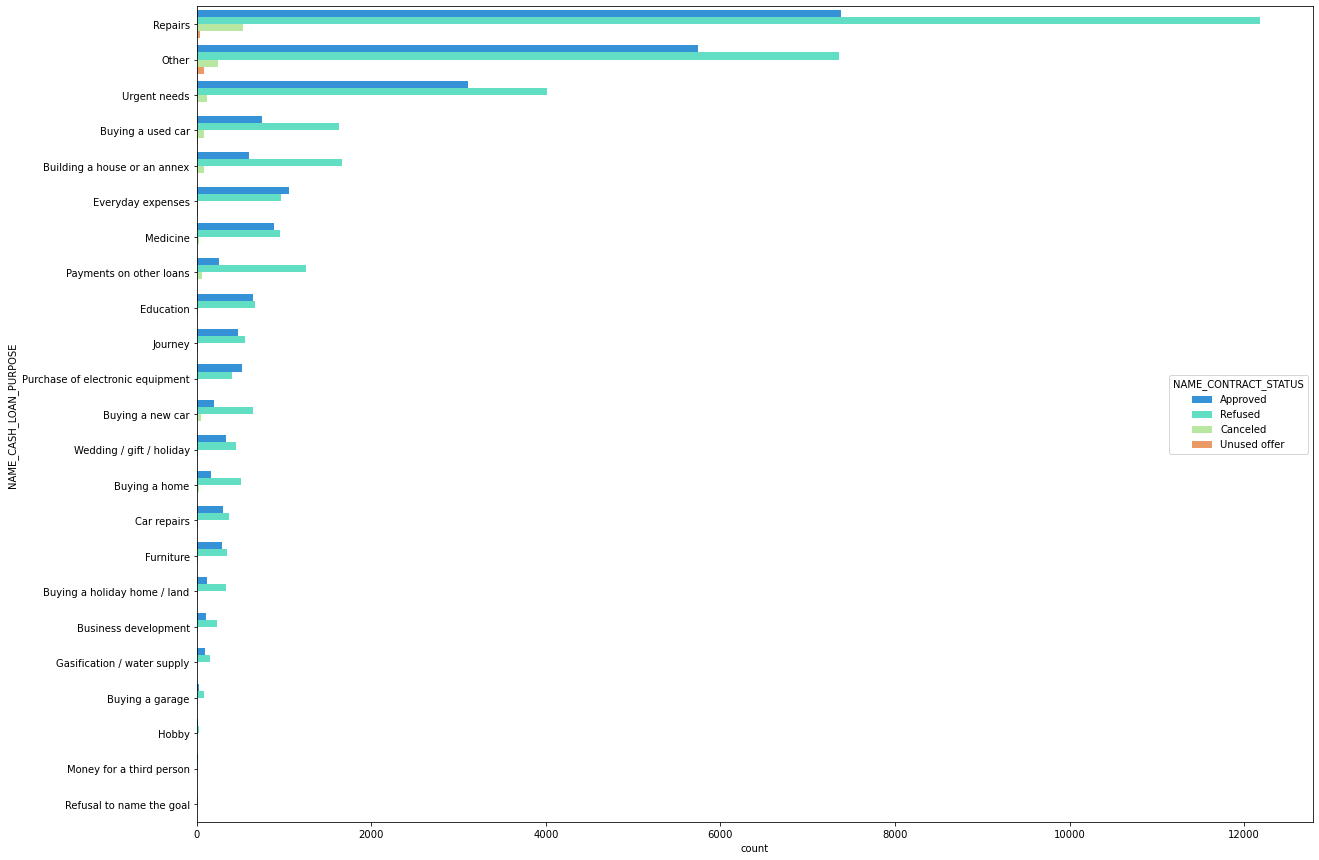

In [227]:
plt.figure(figsize = (20,15))
sns.countplot(data = comb_data, y= 'NAME_CASH_LOAN_PURPOSE',order=prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',palette='rainbow')
plt.show()

#### Few points we can conclude from abpve plot:

1. Loan purposes with 'Repairs' are facing more difficulties in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.eg other , urgent needs
    

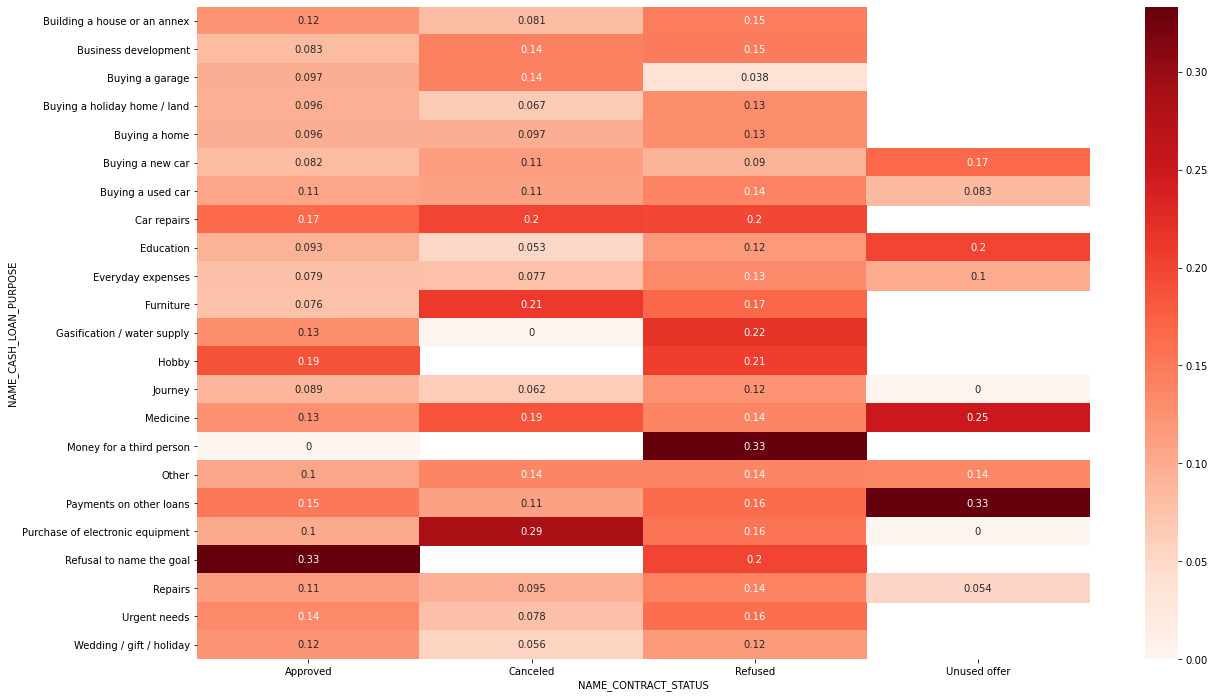

In [228]:
plt.figure(figsize=(20,12))
result = pd.pivot_table(data=comb_data,columns='NAME_CONTRACT_STATUS',index='NAME_CASH_LOAN_PURPOSE',values='TARGET',aggfunc=np.mean)
sns.heatmap(result,cmap="Reds",annot = True)
plt.show()

#### The heat map gives us a significant picture where can see 

1> Among approved loans where purpose is "Refusal to name the goal" has maximum number of defaulters

2> In Refused people buying a garage are people who are less likely to do fraud with the bank and hence banks consider them for approving the loans.

# CONCLUSION

1.> Banks should focus more on people where the education level is apt  and  salary status is sound for better repayment      percentage.

2.> Banks should focus less on people with income type ‘Working’ as they are having most number of unsuccessful payments and may lead to frauds.

3.> If the purpose of loan is ‘Repair’ in that case the banks should be very     careful in passing the loan as it may lead to frauds

4.>For the banks people who live ‘With parents’ are the people having least   number of unsuccessful payments.

5.>Banks should also refrain from giving loans to widows as they have higher percentage of defaulters.

6.>Working people who work as POLICE should also be cross verified a lot as they have maximum percentage of defaulters. 

